# Определение возможной успешности видеоигры

# Описание данных

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.query('Platform =="DS" and Year_of_Release < 2004')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


In [5]:
data.query('Platform =="GB" and Year_of_Release < 1989')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1340,Disney's DuckTales,GB,1988.0,Platform,0.82,0.23,0.35,0.03,NaN,NaN,NaN


In [6]:
data.query('Platform =="3DS" and Year_of_Release < 2011')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [7]:
data.query('Platform =="PS3" and Year_of_Release < 2006')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Переведем названия столбцов в нижний регистр

In [10]:
data.columns = data.columns.str.lower()

In [11]:
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [14]:
data.shape

(16715, 11)

Изучив таблицу были найдены в столбцах пропуски данных. На следующем этапе проверим, что это за данные и будем принимать решение, что с ними делать

## Предобработка данных

### Столбец `name`

In [15]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как мы не можем узнать название игры/жанр и очень низкие показатели, которые в выборке 16715 игр не повлияют на анализ, можем их удалить

In [16]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(inplace=True,drop=True)

In [17]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Столбец `year_of_release`

In [18]:
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16403,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16446,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16456,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
data.query('year_of_release.isnull()')['platform'].value_counts()

ps2     34
wii     34
ds      30
x360    30
ps3     25
xb      21
2600    17
pc      17
psp     16
gc      14
gba     11
3ds      8
ps       7
n64      3
psv      1
gb       1
Name: platform, dtype: int64

In [20]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(inplace=True,drop=True)

In [21]:
data['year_of_release'].isnull().sum()

0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [24]:
data['year_of_release'] = data['year_of_release'].astype(int)

### Столбцы `critic_score`, `user_score`, `rating`

In [25]:
data.query('critic_score.isnull()').head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [26]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.2       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Странное совпадение, что столбцы `critic_score`, `user_score`, `rating` пустые в один и тех играх в большенстве своем. Стоит сначала проверить почему это могло так получиться, прежде чем обрабатывать данные.

In [27]:
data.query('name == "minecraft"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
72,minecraft,x360,2013,misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
180,minecraft,ps3,2014,misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN
260,minecraft,ps4,2014,misc,1.48,2.02,0.14,0.68,NaN,NaN,NaN
539,minecraft,xone,2014,misc,1.61,0.90,0.00,0.25,NaN,NaN,NaN
857,minecraft,psv,2014,misc,0.18,0.64,0.90,0.24,NaN,NaN,NaN
2933,minecraft,wiiu,2016,misc,0.28,0.17,0.18,0.04,NaN,NaN,NaN


In [28]:
data.query('name == "mario & sonic at the olympic games"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
86,mario & sonic at the olympic games,wii,2007,sports,2.57,3.86,0.66,0.91,NaN,NaN,NaN
197,mario & sonic at the olympic games,ds,2008,sports,1.63,2.45,0.44,0.57,NaN,NaN,NaN


In [29]:
data.query('name == "star wars battlefront (2015)"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
341,star wars battlefront (2015),xone,2015,shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN
3616,star wars battlefront (2015),pc,2015,shooter,0.13,0.38,0.00,0.04,NaN,NaN,NaN


Было предположение, что игра не было оценена на какой-то конкретной платформе, но как мы видим на мультиплатформенных игр, такой закономерности нету. Сложно предположить почему именно эти игры так как есть и старые игры и новые, мультиплееры и одиночные игры. Так как эти данные не возможно заменить на какое-либо другое (к примеру среднее значение) и таких пропусков слишком много, было принято решение оставить как есть.

Так же, в столбце `user_score` были замечаны значения "tbd"

In [30]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
300,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
516,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
639,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
709,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16424,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16426,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16427,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16433,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

так как мы не можем заменить эту аббревиатуру на какое-либо значение, поставим вместо этого значения пропуски дла дальнейшего анализа

In [31]:
data['user_score'].isnull().sum()

6605

In [32]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [33]:
data['user_score'].isnull().sum()

8981

Поменяем формат столбца user_score на float и critic_score на int

In [34]:
data['user_score'] = data['user_score'].astype(float)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Столбец `platfrom`

Стоит проверить, нету ли очевидных ошибок не состыковки платформы с годом выпуском игры.

In [36]:
platform_year=data.pivot_table(index='platform',values='year_of_release',aggfunc=('min','max'))

In [37]:
platform_year

,max,min
platform,,
2600,1989,1980
3do,1995,1994
3ds,2016,2011
dc,2008,1998
ds,2013,1985
gb,2001,1988
gba,2007,2000
gc,2007,2001
gen,1994,1990


Прошерстив интернет, нашли не состыковки: GB вышел в 1989, DS в 2004
Стоит проверить, что это были за игры

In [38]:
data.query('platform =="ds" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


In [39]:
data.query('platform =="gb" and year_of_release < 1989')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1326,disney's ducktales,gb,1988,platform,0.82,0.23,0.35,0.03,NaN,NaN,NaN


Прогуглив, выяснили, что данная игра на DS вышла в 2010 году. Игра на GB вышла в 1990 году. Игры на 3DS вышли в 2011 и 2012 году соответственно. Игра на PS3 вышла в 2010 году. Возможно опечатка в базе данных. Поменяем год выпуска игры на их настоящий год выпуска

In [40]:
data.loc[data['name']=='strongest tokyo university shogi ds', 'year_of_release'] = 2010
data.loc[data['name']=="disney's ducktales", 'year_of_release'] = 1990

In [41]:
data.duplicated().sum()

0

In [42]:
# check
data1 = pd.read_csv('/datasets/games.csv')
data1.columns = data1.columns.str.lower()

In [43]:
# check
data1.query('platform =="3DS" and year_of_release < 2011')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [44]:
# check
data1.query('platform =="PS3" and year_of_release < 2006')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Столбец `rating`

In [45]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [46]:
data.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [47]:
data['rating'].isnull().sum()

6676

In [48]:
data['rating'] = data['rating'].fillna('not_rated')

In [49]:
data['rating'].isnull().sum()

0

В столбце `rating` заменили все пропуски на значение "not_rated". Так как рейтинг не является обязательным для выпуска игры, можно предположить что производители этихх игр не захотели их оценивать

### Cуммарные продажи во всех регионах

In [50]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [51]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,not_rated,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,not_rated,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,not_rated,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,not_rated,28.31


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Распределение игр по годам

In [53]:
sales_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
sales_year.columns=['counts_of_games']

In [54]:
sales_year

,counts_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,14


Text(0, 0.5, 'Количество игр')

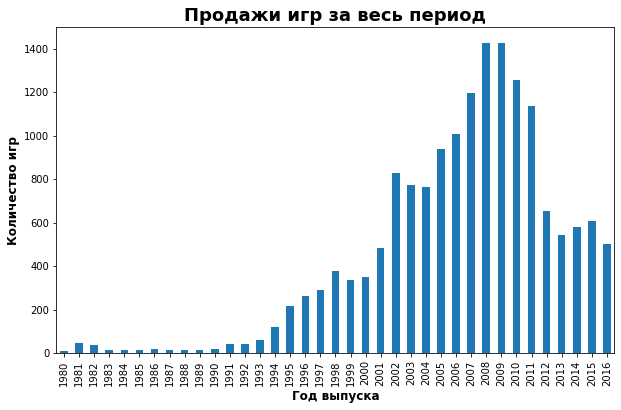

In [55]:
sales_year.plot(kind='bar',figsize=(10,6), legend=False)
plt.title("Продажи игр за весь период", fontsize=18, fontweight="bold")
plt.xlabel("Год выпуска", fontsize=12, fontweight="bold")
plt.ylabel("Количество игр", fontsize=12, fontweight="bold")

Как мы можем видеть, резкие скачки количества выпускаемых игр были в момент выхода нового поколения консолей к примеру: PS1 - 1994, PS2 - 2000, PS3 - 2006, PS4 - 2013. Мы можем заметить, что в 2009 году, количество игр резко уменьшилось. Даже с выходом нового поколения рост количества игр был не такой большой. Но это связано больше не с потерей интереса на игры, а с тем, что игровые студии начали выпускать более крупные и комплексные игры, по сравнению с тем, что было в нулевых

### Продажи по платформам

In [56]:
sales_platform = data.pivot_table(index='platform',values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)

In [57]:
sales_platform

,sum_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Как мы можем заметить, плафторма PS2 имеет наибольшие суммарные продажи по играм. Возьмем первые пять платформ и построим распределение продаж игр по годам

In [58]:
top_sales = sales_platform.nlargest(5,'sum_sales')

In [59]:
top_sales

,sum_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78


In [60]:
platform_grouped = top_sales.reset_index()

In [61]:
platform_grouped = platform_grouped['platform'].unique()
platform_grouped

array(['ps2', 'x360', 'ps3', 'wii', 'ds'], dtype=object)

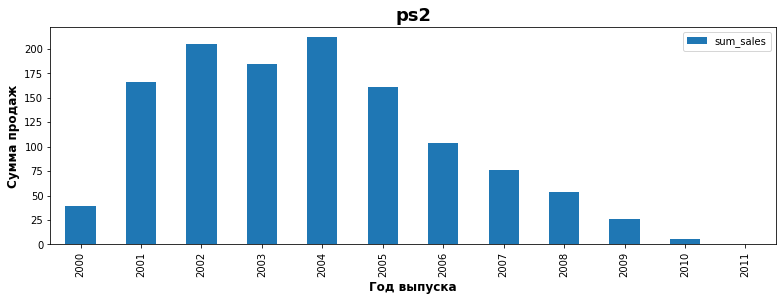

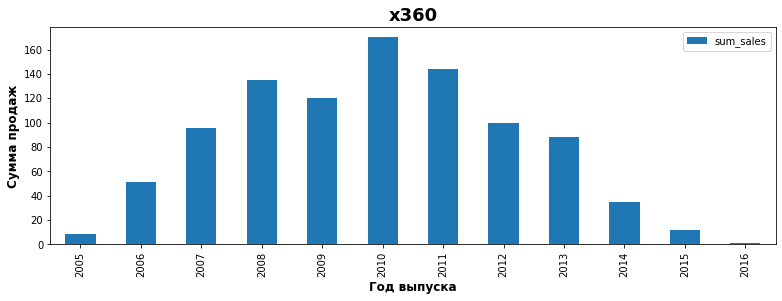

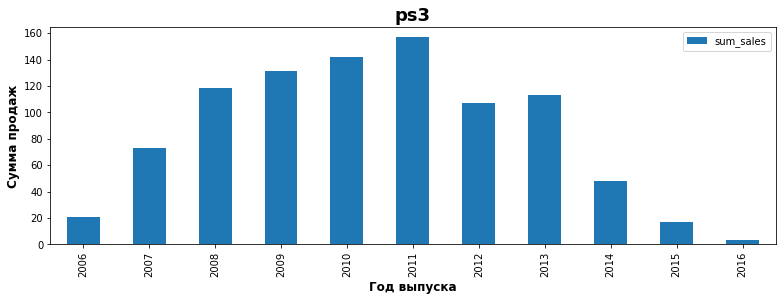

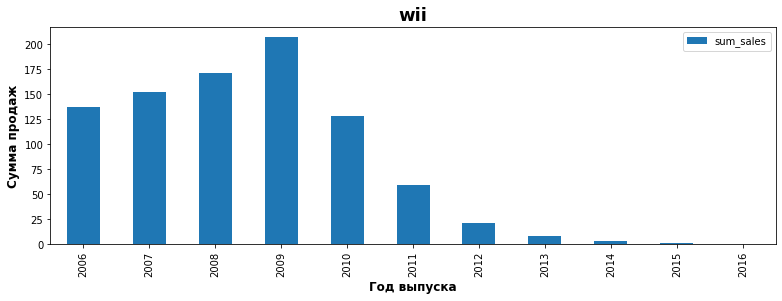

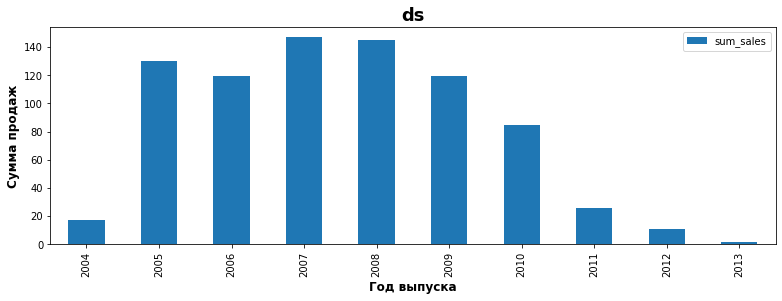

In [62]:
for platform in platform_grouped:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.xlabel("Год выпуска", fontsize=12, fontweight="bold")
    plt.ylabel("Сумма продаж", fontsize=12, fontweight="bold")
    plt.title(platform, fontsize=18, fontweight="bold")

Исходя из этих графиков, можно выделить время "жизни" платморфы 8-10 лет. Но в в первый год и последние 2-3 года всегда самые низкие продажи за весь период жизни платформы. Это связано с многими факторами:
* Платформа только появилась на рынке и не у всех есть возможность купить новую / обновить старую платформу
* К 3-4 году жизни платформы, разработчки выжимают по максимум все физические возможности платформы и это самые продвинутые в плане графики/сюжета игры за все сюществование платформы
* в конфе жизни платформы, у нее появляются более продвинутая версия (например PS3-PS4), но так как не все имеют возможность сразу перейти на новую платформу, продолжают пользоваться старой, но уже не с такой популярностью

### Актуальный период

Для дальнейшего анализа, мы не можем использовать данных по всем платформам, так как давно забытые платформы такие как например TG16. Продажи в те времена и сейчас абсолютно разные и их нельзя сравнивать

Text(0.5, 1.0, 'Распределение количества выпущенных игр с 1980-2016гг.')

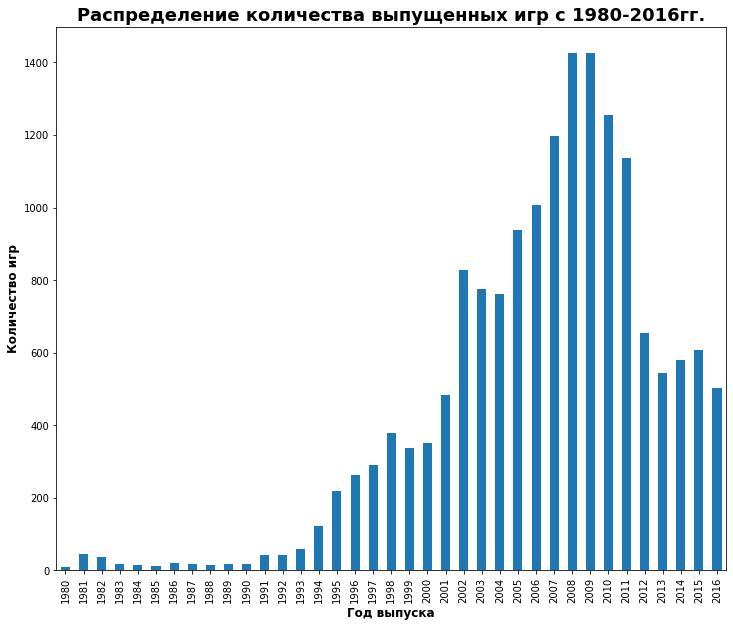

In [63]:
sales_year.plot(kind='bar',figsize=(12,10), legend=False)
plt.xlabel("Год выпуска", fontsize=12, fontweight="bold")
plt.ylabel("Количество игр", fontsize=12, fontweight="bold")
plt.title("Распределение количества выпущенных игр с 1980-2016гг.", fontsize=18, fontweight="bold")

По данному графику, приведенный ранее в проекте, можем определить 4 временных периода
* 1980 - 1994г - так сказать рассвет, начало игровой индустрии;
* 1995 - 2001г - период, когда "игру" еще нельзя было назвать "игрой", но люди уже жаждали этого;
* 2002 - 2007г - появление мастадонтов игровой индрустрии, которые полностью завоевали рынок;
* 2008 - 2009г - пик игровой индустрии, самые большое количество выпущенных игр;
* 2010 - 2011г - начало спада количества игр, связанный с тем, что игры стали более комплексные
* 2012 - настоящее время - спад количества игр (скорее связанный не с потерей интереса к видеоиграм, а с вытеснением более мелких компаний, а так же более комплексных проектов)

Для дальнейшего анализа, возьмем временный период с 2012г. Так как до 2012 года были резкие подъемы-падения. Начиная с 2012 года распределения количества выпущенных игр более менее стабильно, а также не стоит брать широкий временной диапазон для анализа рынка.

In [64]:
actual_data = data[data['year_of_release'] >= 2012]
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_rated,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,not_rated,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79


In [65]:
actual_data.shape

(2886, 12)

In [66]:
summary_games_actual_time = len(actual_data['name'])/len(data['name'])

In [67]:
print('Доля игр, выпущенных после 2012 года:', f"{summary_games_actual_time:.1%}")

Доля игр, выпущенных после 2012 года: 17.6%


### Потенциально прибильные компании

Посмотрим потенциально прибильные и живые компании за этот период времени

In [68]:
potencial_data = actual_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending = False)
potencial_data

,sum_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


In [69]:
potencial_data_grouped = potencial_data.reset_index()
potencial_data_grouped=potencial_data_grouped['platform'].unique()
potencial_data_grouped

array(['ps4', 'ps3', 'x360', '3ds', 'xone', 'wiiu', 'pc', 'psv', 'wii',
       'ds', 'psp'], dtype=object)

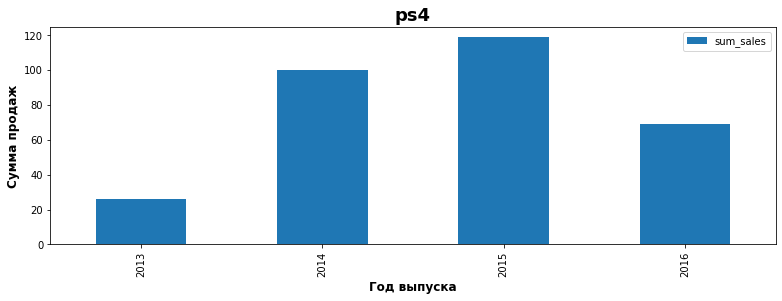

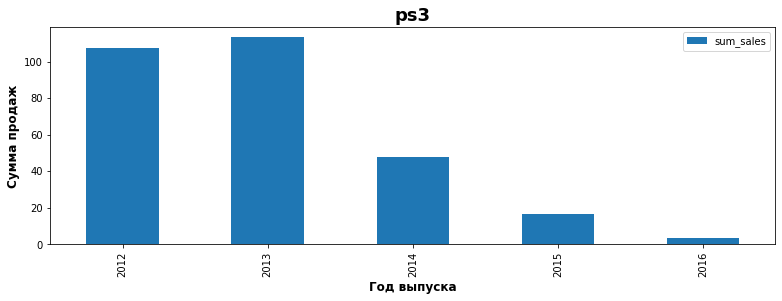

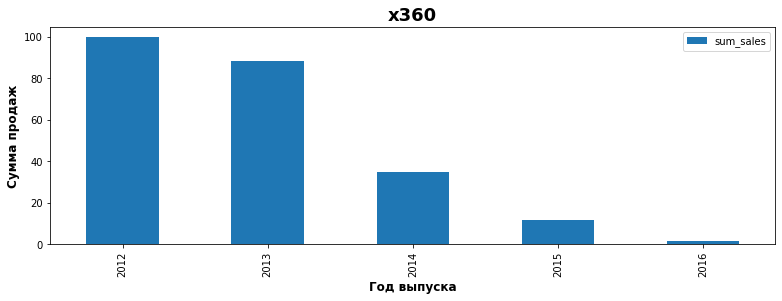

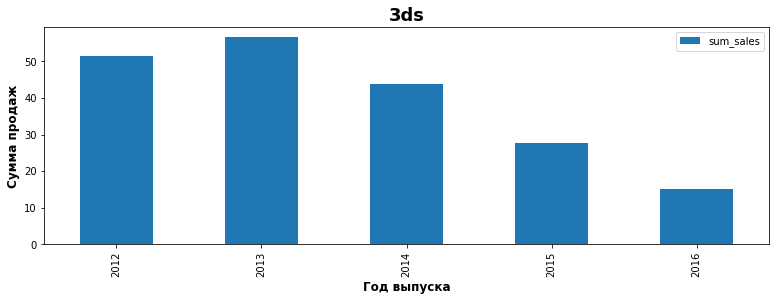

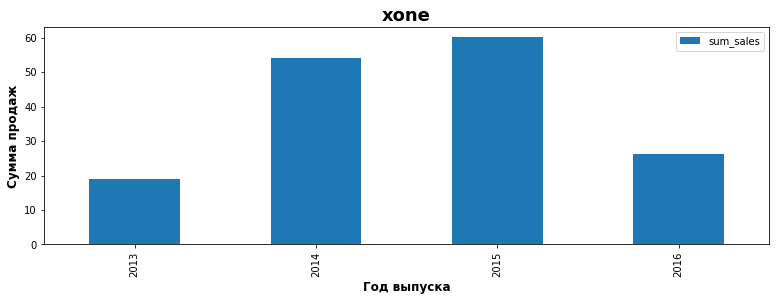

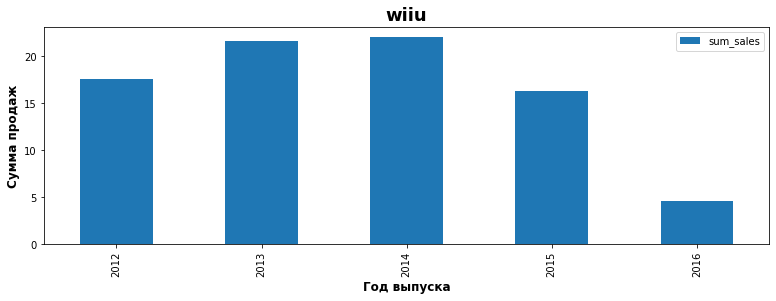

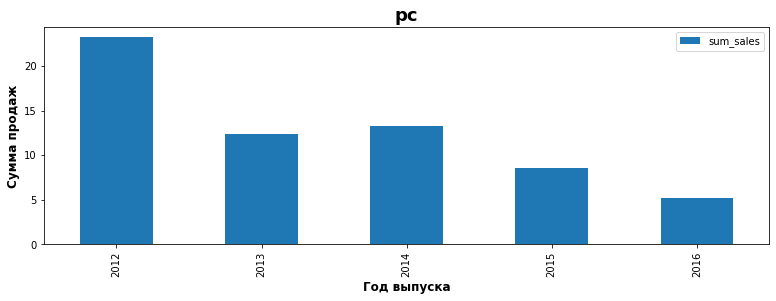

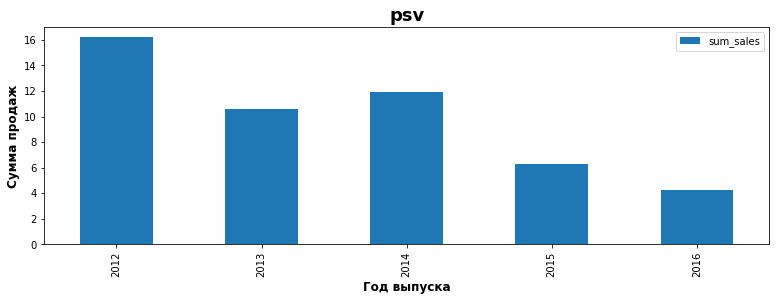

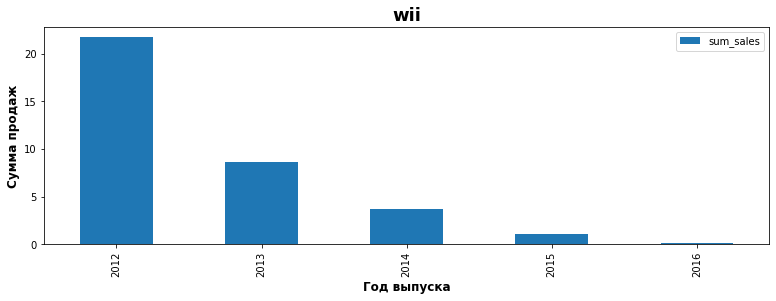

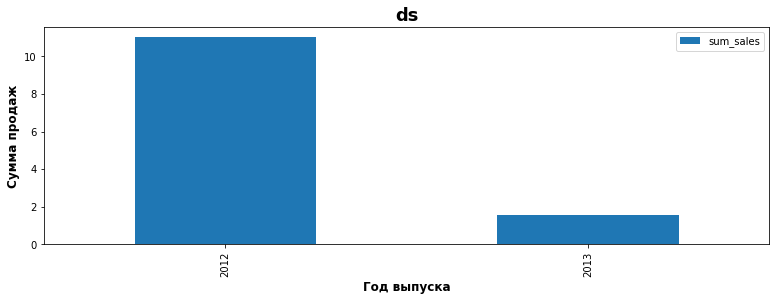

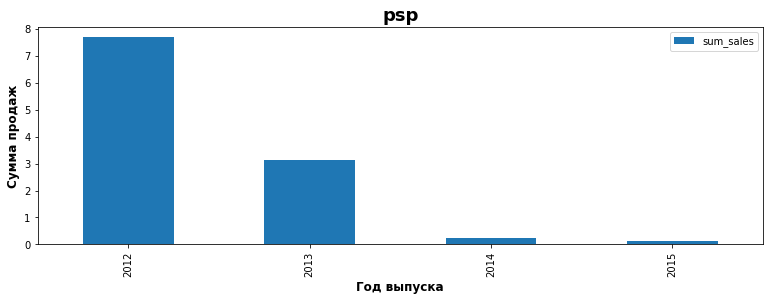

In [70]:
for platform in potencial_data_grouped:
    actual_data[actual_data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.xlabel("Год выпуска", fontsize=12, fontweight="bold")
    plt.ylabel("Сумма продаж", fontsize=12, fontweight="bold")
    plt.title(platform, fontsize=18, fontweight="bold")

По этим данным мы видим, что к 2016 году уже существуют "мертвые" платформы"
Поэтому будет использовать только те платформы, которые потенциально еще живы и могут приносить прибыль

In [71]:
list_top_platforms = ['psv', 'wiiu', 'pc', 'xone','3ds', 'ps4']
top_platforms = actual_data[actual_data['platform'].isin(list_top_platforms)]
top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_rated,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,not_rated,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,not_rated,11.68
62,new super mario bros. 2,3ds,2012,platform,3.66,3.14,2.47,0.63,78.0,7.2,e,9.90
73,animal crossing: new leaf,3ds,2012,simulation,2.03,2.36,4.39,0.39,88.0,8.7,e,9.17
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,not_rated,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60


In [72]:
top_platforms_actual_time = len(top_platforms['name'])/len(data['name'])

In [73]:
print('Доля игр на лидирующих платформах, выпущенных после 2012 года:', f"{top_platforms_actual_time:.1%}")

Доля игр на лидирующих платформах, выпущенных после 2012 года: 11.2%


In [74]:
top_platforms['platform'].value_counts()

psv     411
3ds     396
ps4     392
pc      250
xone    247
wiiu    147
Name: platform, dtype: int64

In [75]:
top_platforms.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
pc,250.0,0.250600,0.494640,0.01,0.03,0.08,0.2400,5.14
ps4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
psv,411.0,0.119659,0.203011,0.01,0.02,0.05,0.1200,1.96
wiiu,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
xone,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

(0.0, 2.5)

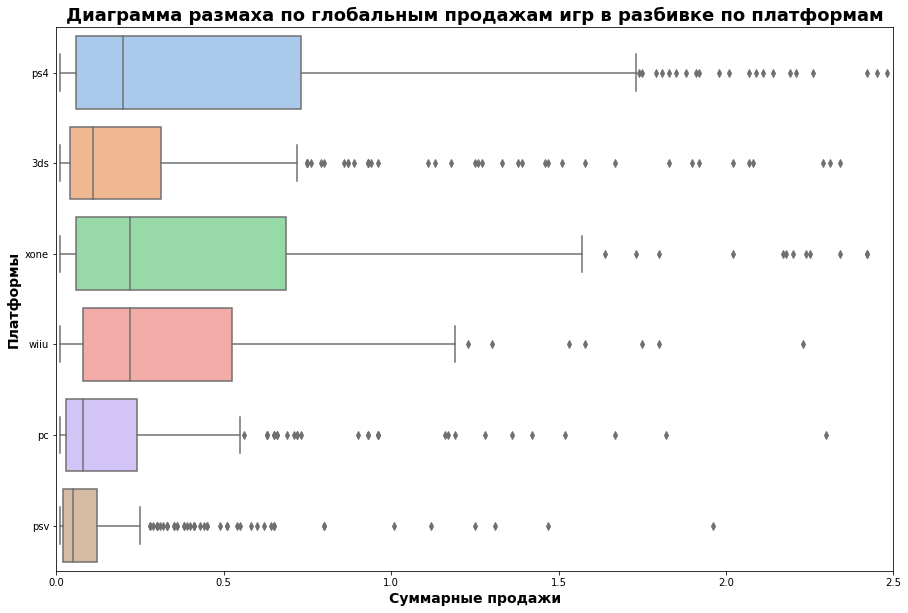

In [76]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_platforms, x='sum_sales', y='platform', palette = 'pastel')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам', fontsize=18, fontweight="bold")
plt.xlabel("Суммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)

Text(0, 0.5, 'Платформы')

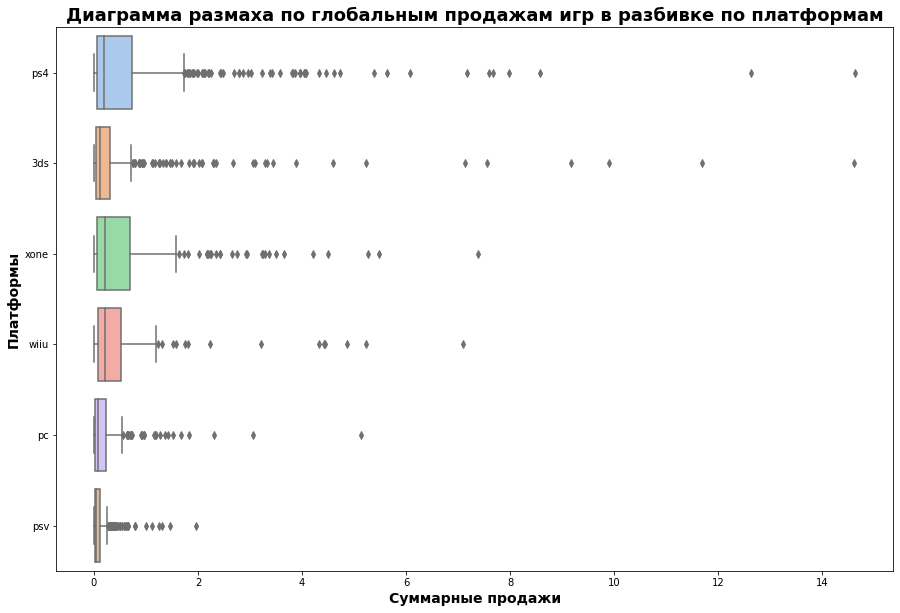

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_platforms, x='sum_sales', y='platform', palette = 'pastel')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам', fontsize=18, fontweight="bold")
plt.xlabel("Суммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")

По данной диаграмме можно сделать выводы:
* Медиан всех платформ лежит в разных промежутках продаж;
* PSV показывает худший результат в то время как XOne и PS4 занимают лидирующую позицию;
* Можно отметить WiiU которая не была популярна в России, но имеют очень хороший показатель, не стоит сбрасывать Nintendo, мастадонта игровой индустрии со счетов;
* не такие большие продажи PC можно объяснить тем, что люди предпочитают (если имеют такую возможность) играть на консолях, чем на компьютере, а также игры на PC на порядок ниже чем на консолях.

### Влияние отзывов на продажи на основе самой популярной платформы

В лидерах по продажам является PS4

In [78]:
ps4 = top_platforms.query('platform == "ps4"')

Корреляция между оценками пользователей и продажами -0.031957110204556376


<Figure size 864x432 with 0 Axes>

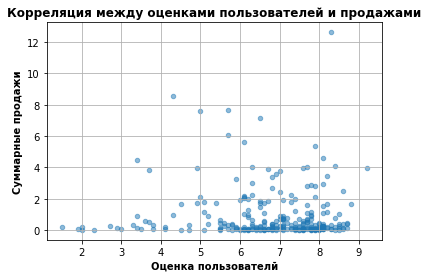

In [79]:
plt.figure(figsize=(12,6))
ps4.plot(kind='scatter', x='user_score', y='sum_sales', grid=True, alpha=0.5)
plt.title('Корреляция между оценками пользователей и продажами', fontsize=12, fontweight="bold")
plt.xlabel("Оценка пользователй", fontsize=10, fontweight="bold")
plt.ylabel("Суммарные продажи", fontsize=10, fontweight="bold")
print('Корреляция между оценками пользователей и продажами', ps4['user_score'].corr(ps4['sum_sales']))

Корреляция между оценками критиков и продажами 0.40656790206178095


<Figure size 864x432 with 0 Axes>

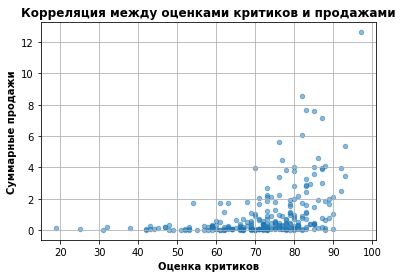

In [80]:
plt.figure(figsize=(12,6))
ps4.plot(kind='scatter', x='critic_score', y='sum_sales', grid=True, alpha=0.5)
plt.title('Корреляция между оценками критиков и продажами', fontsize=12, fontweight="bold")
plt.xlabel("Оценка критиков", fontsize=10, fontweight="bold")
plt.ylabel("Суммарные продажи", fontsize=10, fontweight="bold")
print('Корреляция между оценками критиков и продажами', ps4['critic_score'].corr(ps4['sum_sales']))

Мы можем наблюдать слабую линейную зависимость между оценками критиков и продажами, а также очень слабую линейную зависимость между оценками пользователей и продажами. Тем самым, мы не можем четко сказать, зависит ли от оценок как критиков, так и пользователей, количество продаж на платформе "PS4"

### Влияние отзывов на продажи среди всех платформ

Теперь стоит посмотреть на влияение отзывов по всем актуальным платформам

In [81]:
def platform_matrix(name_of_platform):
    platform = top_platforms[top_platforms['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sum_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sum_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15, fontweight="bold")
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])
    
    if (0.9 <= round(correl, 3) <= 1) or (-1 <= round(correl, 3) <= -0.9):
        print('Корреляция между отзывами пользователей и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Очень сильная:", round(correl, 3))
    elif (0.7 <= round(correl, 3) < 0.9) or (-0.9 < round(correl, 3) <= -0.7):
        print('Корреляция между отзывами пользователей и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Сильная:", round(correl, 3))
    elif (0.4 <= round(correl, 3) < 0.7) or (-0.7 < round(correl, 3) <= -0.4):
        print('Корреляция между отзывами пользователей и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Умеренная:", round(correl, 3))
    elif (0.2 <= round(correl, 3) < 0.4) or (-0.4 < round(correl, 3) <= -0.2):
        print('Корреляция между отзывами пользователей и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Слабая:", round(correl, 3))
    elif (0 < round(correl, 3) < 0.2) or (-0.2 < round(correl, 3) < 0):
        print('Корреляция между отзывами пользователей и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Очень слабая:", round(correl, 3))
    else:
        print('Корреляция отсутствует отзывами пользователей и количеством продаж на игровой платформой',
              name_of_platform.upper(), ":", round(correl, 3))
        
        
    if (0.9 <= round(critic_correl, 3) <= 1) or (-1 <= round(critic_correl, 3) <= -0.9):
        print('Корреляция между отзывами критиков и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Очень сильная:", round(critic_correl, 3))
    elif (0.7 <= round(critic_correl, 3) < 0.9) or (-0.9 < round(critic_correl, 3) <= -0.7):
        print('Корреляция между отзывами критиков и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Сильная:", round(critic_correl, 3))
    elif (0.4 <= round(critic_correl, 3) < 0.7) or (-0.7 < round(critic_correl, 3) <= -0.4):
        print('Корреляция между отзывами критиков и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Умеренная:", round(critic_correl, 3))
    elif (0.2 <= round(critic_correl, 3) < 0.4) or (-0.4 < round(critic_correl, 3) <= -0.2):
        print('Корреляция между отзывами критиков и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Слабая:", round(critic_correl,3))
    elif (0 < round(critic_correl, 3) < 0.2) or (-0.2 < round(critic_correl, 3) < 0):
        print('Корреляция между отзывами критиков и количеством продаж на игровой платформой',
              name_of_platform.upper(), "Очень слабая:", round(critic_correl, 3))
    else:
        print('Корреляция отсутствует отзывами критиков и количеством продаж на игровой платформой',
              name_of_platform.upper(), ":", round(critic_correl, 3))

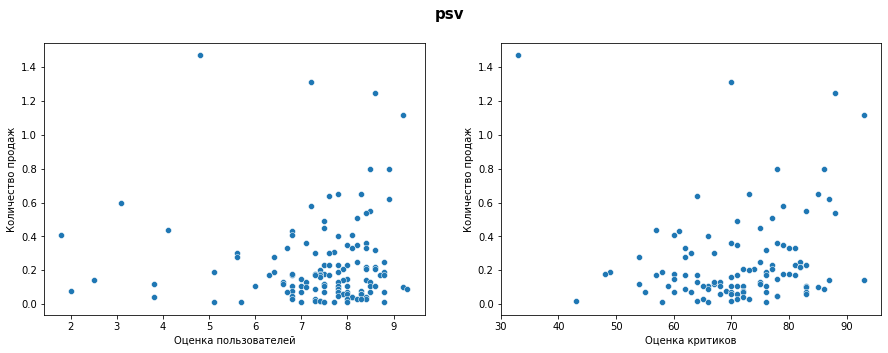

Корреляция между отзывами пользователей и количеством продаж на игровой платформой PSV Очень слабая: -0.004
Корреляция между отзывами критиков и количеством продаж на игровой платформой PSV Очень слабая: 0.094


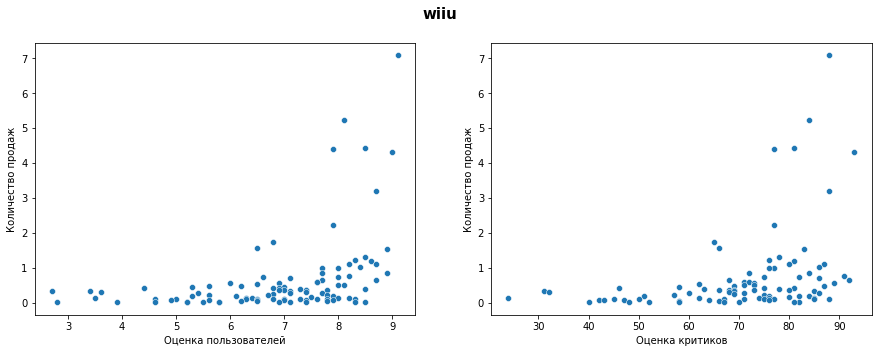

Корреляция между отзывами пользователей и количеством продаж на игровой платформой WIIU Умеренная: 0.4
Корреляция между отзывами критиков и количеством продаж на игровой платформой WIIU Слабая: 0.348


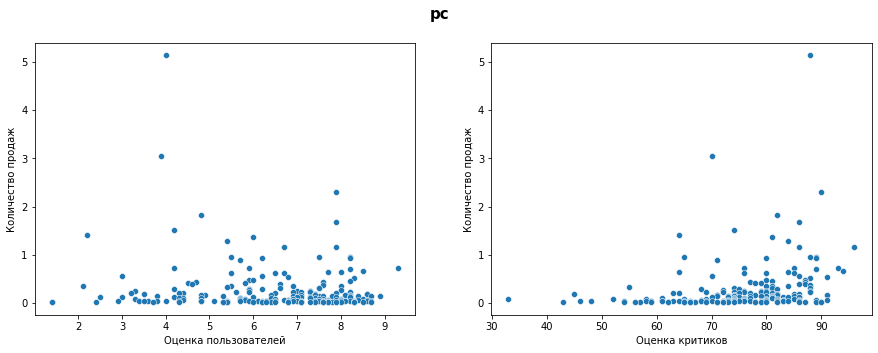

Корреляция между отзывами пользователей и количеством продаж на игровой платформой PC Очень слабая: -0.122
Корреляция между отзывами критиков и количеством продаж на игровой платформой PC Слабая: 0.237


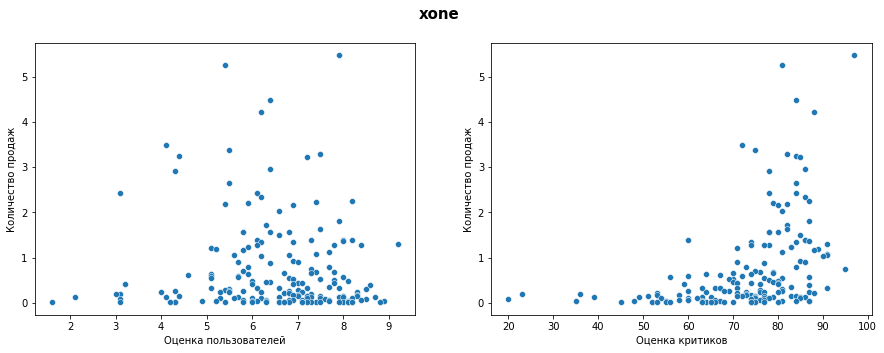

Корреляция между отзывами пользователей и количеством продаж на игровой платформой XONE Очень слабая: -0.069
Корреляция между отзывами критиков и количеством продаж на игровой платформой XONE Умеренная: 0.417


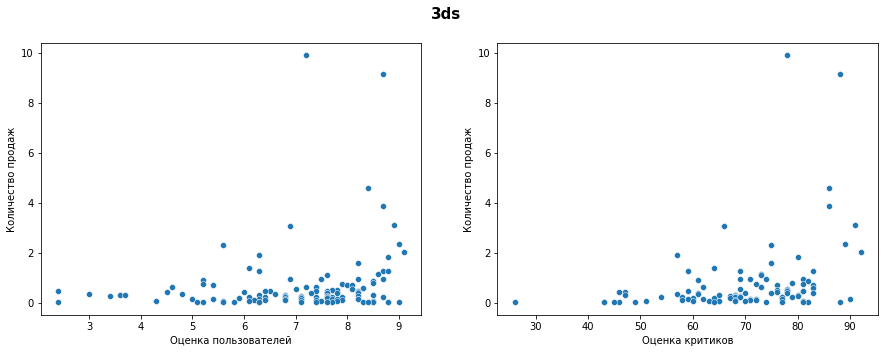

Корреляция между отзывами пользователей и количеством продаж на игровой платформой 3DS Очень слабая: 0.198
Корреляция между отзывами критиков и количеством продаж на игровой платформой 3DS Слабая: 0.321


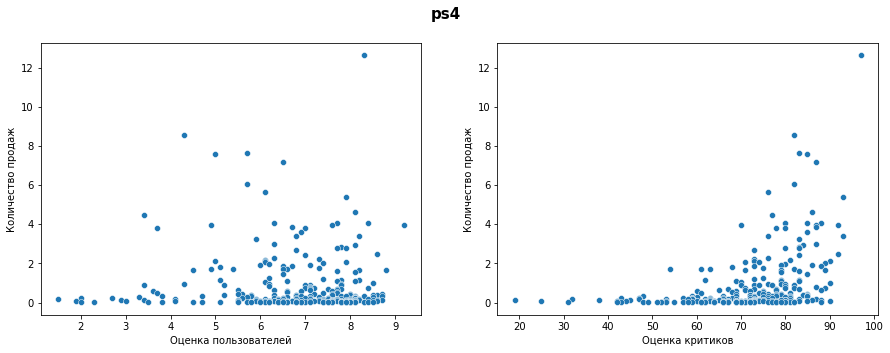

Корреляция между отзывами пользователей и количеством продаж на игровой платформой PS4 Очень слабая: -0.032
Корреляция между отзывами критиков и количеством продаж на игровой платформой PS4 Умеренная: 0.407


In [82]:
for platform in list_top_platforms:
    platform_matrix(platform)

Так как корреляция между отзывами и количеством продаж показывает очень слабую линейную зависимость, мы не можем точно заявить, что оценки как критиков, так и пользователей, влияют на количество продаж игр на той или иной платформе


### Общее распределение игр по жанрам

Посмотрим на распределение по жанрам, какие из них самые популярные и востребованные

Text(0.5, 1.0, 'Распределение игр по жанрам')

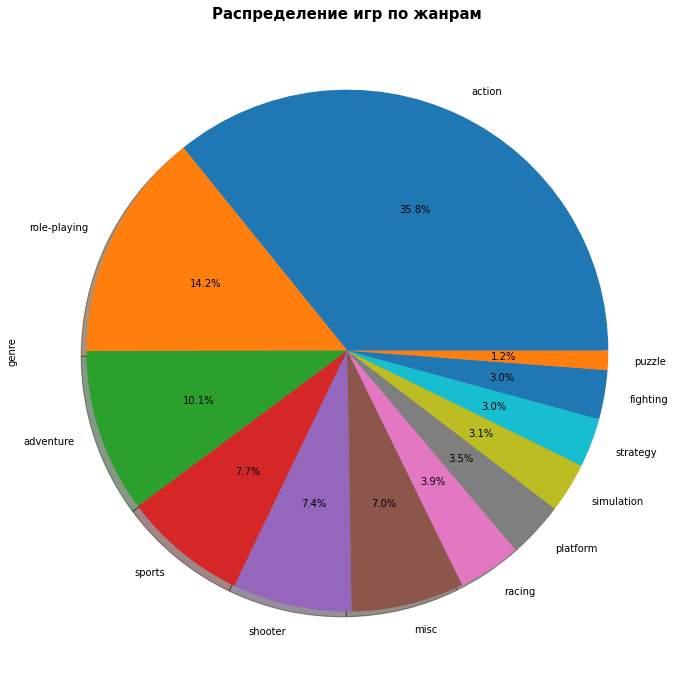

In [83]:
explode = (0.05)
top_platforms['genre'].value_counts().plot(kind='pie', figsize=(12, 12), legend=False, shadow = True, autopct='%1.1f%%')
                                          
plt.title('Распределение игр по жанрам', fontsize=15, fontweight="bold")

Как мы можем заметить, игр жанра "Action" на порядок больше чем всех остальных и составляет 35.8% от всех игр. Игры жанра "Puzzle" на самом последнем месте, всего лишь 1.2% от всех игр

Посмотрим на распределение жанра и продаж по всем этим платформам

In [84]:
sum_genre = top_platforms.pivot_table(index='genre', aggfunc={'sum_sales': sum}).sort_values('sum_sales', ascending=False)
sum_genre

,sum_sales
genre,
action,227.44
shooter,171.64
role-playing,147.43
sports,96.21
platform,51.66
misc,42.58
racing,33.52
simulation,31.32
fighting,28.16


Text(0.5, 1.0, 'Распределение продаж по жанрам')

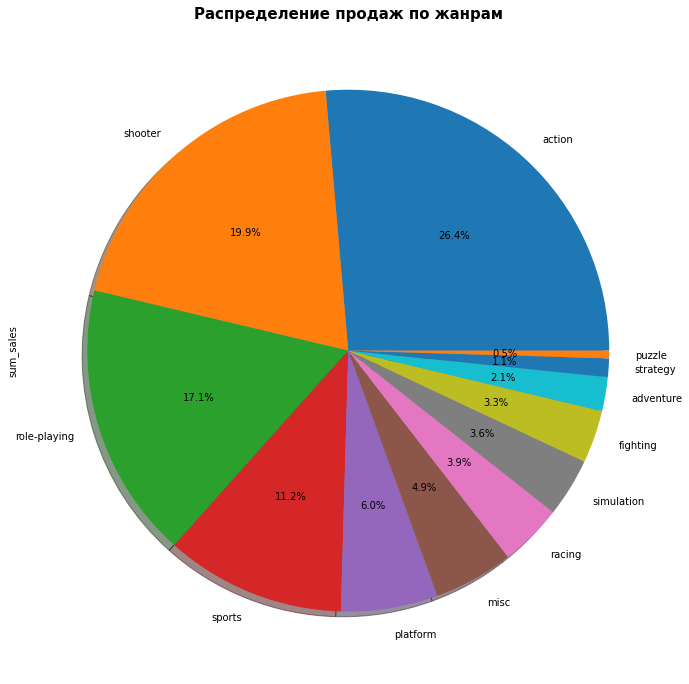

In [85]:
sum_genre.plot(kind='pie', subplots=True, figsize=(12, 12), legend=False, shadow = True, autopct='%1.1f%%')
                                          
plt.title('Распределение продаж по жанрам', fontsize=15, fontweight="bold")

In [86]:
sum_genre = sum_genre.reset_index()

In [87]:
sum_genre

,genre,sum_sales
0,action,227.44
1,shooter,171.64
2,role-playing,147.43
3,sports,96.21
4,platform,51.66
5,misc,42.58
6,racing,33.52
7,simulation,31.32
8,fighting,28.16
9,adventure,18.15


Text(0, 0.5, 'Платформы')

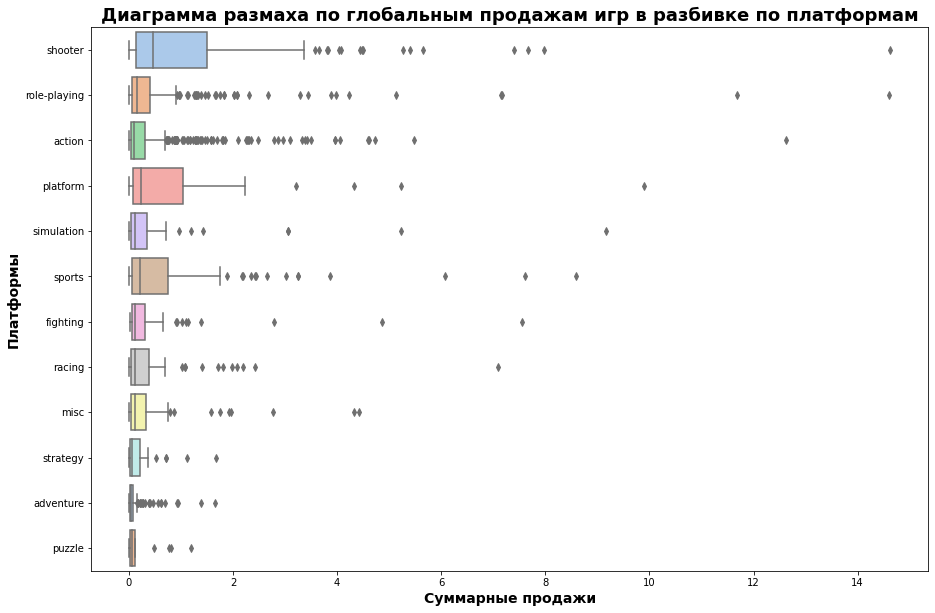

In [88]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_platforms, x='sum_sales', y='genre', palette = 'pastel')
plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам', fontsize=18, fontweight="bold")
plt.xlabel("Суммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")

(0.0, 2.0)

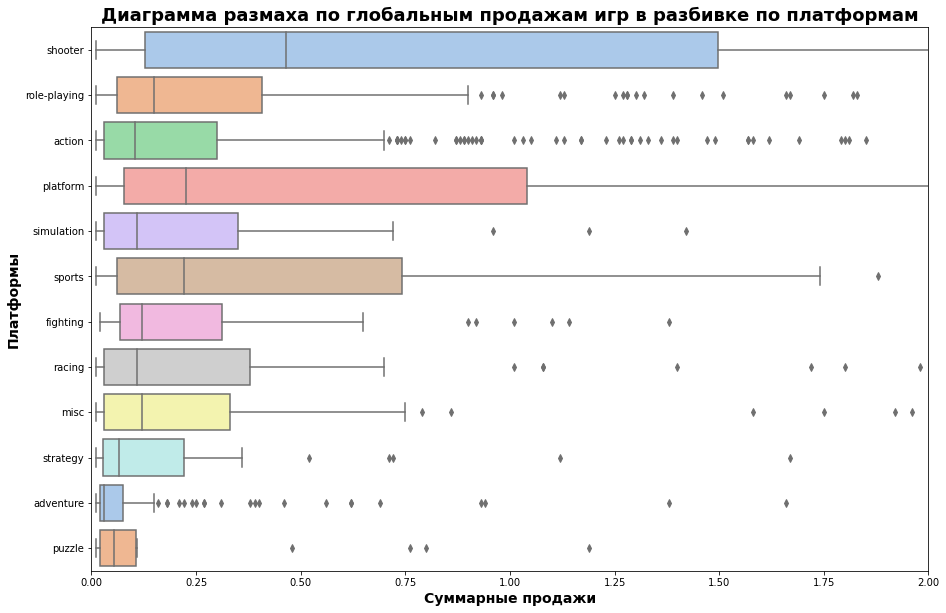

In [89]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_platforms, x='sum_sales', y='genre', palette = 'pastel')
plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам', fontsize=18, fontweight="bold")
plt.xlabel("Суммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2)

По суммарным продажам лидирует жанр "Action" а меньше всего у "Puzzle", но как мы можем видеть на диаграмме размаха, игры в жанре "Shooter" в среднем приносят больше денег нежели любой другой жанр. В то время как игры жанра "Adventure" являются самыми низкоприбыльными.

Но нужны не забывать, что игры в жанре "Action" и "Shooter" стоят гораздо дороже, чем "Puzzle"

### Вывод

* Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года;
* Самые популярные игровые платформы за весь период : PS2, X360, PS3, Wii, DS, PS;
* Время "жизни" платморфы 8-10 лет. Но в в первый год и последние 2-3 года всегда самые низкие продажи за весь период жизни платформы;
* Мы выявили, что на продажи оценки критиков влияют в малой степени, в то время как оценка пользователей не влияет
* Самый популярный жанр - "Action". Самый не популярный жанр - "Puzzle";
* Самый прибыльный жанр - "Action". Самый не прибыльный жанр - "Puzzle";
* Средние показатели продажи игр больше в жанре "Shooter". Средние показатели продажи игр меньше в жанре "Adventure"


## Портрет пользователя каждого региона

### Портрет пользователя каждого региона за все время

#### Портрет пользователя каждого региона за все время для Американского региона

In [92]:
def pivot(region):
    for i in zip(list(['platform','genre','rating'])):
        pivvot = data.pivot_table(index=i, values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head(5)
        display(pivvot)

In [93]:
top5_platforms_alltime_na = data.pivot_table(index='platform', values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)
top5_genre_alltime_na = data.pivot_table(index='genre', values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)
top5_rating_alltime_na = data.pivot_table(index='rating', values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)

In [94]:
pivot('na_sales')

,platform,na_sales
0,x360,595.74
1,ps2,572.92
2,wii,486.87
3,ps3,390.13
4,ds,380.31


,genre,na_sales
0,action,863.17
1,sports,671.20
2,shooter,584.83
3,platform,444.44
4,misc,399.57


,rating,na_sales
0,e,1274.24
1,not_rated,1225.84
2,t,747.60
3,m,742.89
4,e10+,345.50


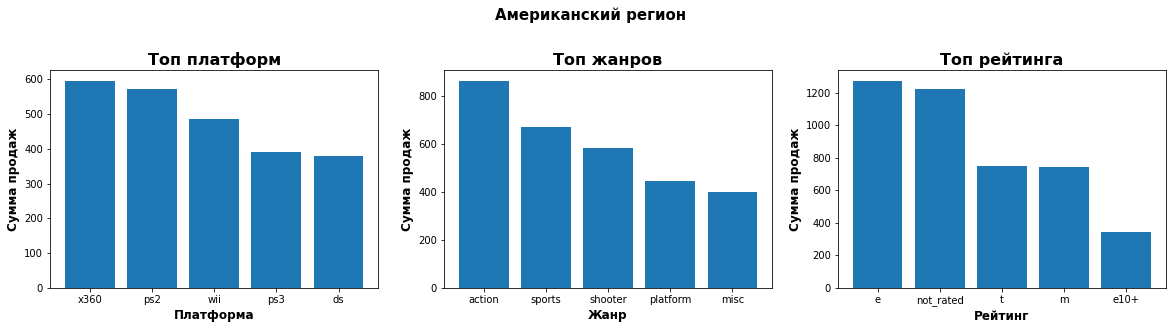

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.bar(top5_platforms_alltime_na['platform'], top5_platforms_alltime_na['na_sales'])
ax1.set_title("Топ платформ", fontsize=16, fontweight="bold")
ax1.set_xlabel('Платформа', fontsize=12, fontweight="bold")
ax1.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

ax2.bar(top5_genre_alltime_na['genre'], top5_genre_alltime_na['na_sales'])
ax2.set_title("Топ жанров", fontsize=16, fontweight="bold")
ax2.set_xlabel('Жанр', fontsize=12, fontweight="bold")
ax2.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")
    
ax3.bar(top5_rating_alltime_na['rating'], top5_rating_alltime_na['na_sales'])
ax3.set_title("Топ рейтинга", fontsize=16, fontweight="bold")
ax3.set_xlabel('Рейтинг', fontsize=12, fontweight="bold")
ax3.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

fig.suptitle('Американский регион', fontsize=15, y=1.1, fontweight="bold")
plt.show()

* Самые популярные игровые платформы в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS.
* Топ 5 жанров в Северной Америке за все время: action, sports, shooter, platform, misc.
* По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "E", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "T".

#### Портрет пользователя каждого региона за все время для Европейского региона

In [96]:
top5_platforms_alltime_eu = data.pivot_table(index='platform', values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)
top5_genre_alltime_eu = data.pivot_table(index='genre', values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)
top5_rating_alltime_eu = data.pivot_table(index='rating', values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)

In [97]:
pivot('eu_sales')

,platform,eu_sales
0,ps2,332.63
1,ps3,327.21
2,x360,268.32
3,wii,258.32
4,ps,212.39


,genre,eu_sales
0,action,510.99
1,sports,371.33
2,shooter,314.52
3,racing,234.49
4,misc,210.60


,rating,eu_sales
0,e,703.87
1,not_rated,609.65
2,m,480.00
3,t,421.79
4,e10+,183.35


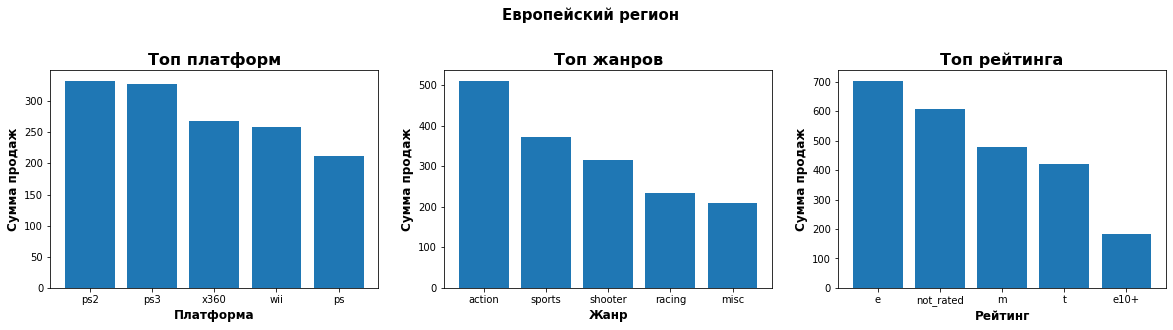

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.bar(top5_platforms_alltime_eu['platform'], top5_platforms_alltime_eu['eu_sales'])
ax1.set_title("Топ платформ", fontsize=16, fontweight="bold")
ax1.set_xlabel('Платформа', fontsize=12, fontweight="bold")
ax1.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

ax2.bar(top5_genre_alltime_eu['genre'], top5_genre_alltime_eu['eu_sales'])
ax2.set_title("Топ жанров", fontsize=16, fontweight="bold")
ax2.set_xlabel('Жанр', fontsize=12, fontweight="bold")
ax2.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")
    
ax3.bar(top5_rating_alltime_eu['rating'], top5_rating_alltime_eu['eu_sales'])
ax3.set_title("Топ рейтинга", fontsize=16, fontweight="bold")
ax3.set_xlabel('Рейтинг', fontsize=12, fontweight="bold")
ax3.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

fig.suptitle('Европейский регион', fontsize=15, y=1.1, fontweight="bold")
plt.show()

* Самые популярные игровые платформы в Европейском регионе за все время это: PS2, PS3, X360, WII, PS.
* Топ 5 жанров в Европе за все время: action, sports, shooter, racing, misc.
* По рейтингам видно, что больше всего продаж у игр с рейтингом "E", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "M".

#### Портрет пользователя каждого региона за все время для Японии

In [99]:
top5_platforms_alltime_jp = data.pivot_table(index='platform', values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)
top5_genre_alltime_jp = data.pivot_table(index='genre', values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)
top5_rating_alltime_jp = data.pivot_table(index='rating', values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)

In [100]:
pivot('jp_sales')

,platform,jp_sales
0,ds,175.02
1,ps,139.78
2,ps2,137.54
3,snes,116.55
4,3ds,100.62


,genre,jp_sales
0,role-playing,353.39
1,action,160.14
2,sports,134.93
3,platform,130.71
4,misc,107.02


,rating,jp_sales
0,not_rated,836.74
1,e,197.96
2,t,150.70
3,m,63.58
4,e10+,40.20


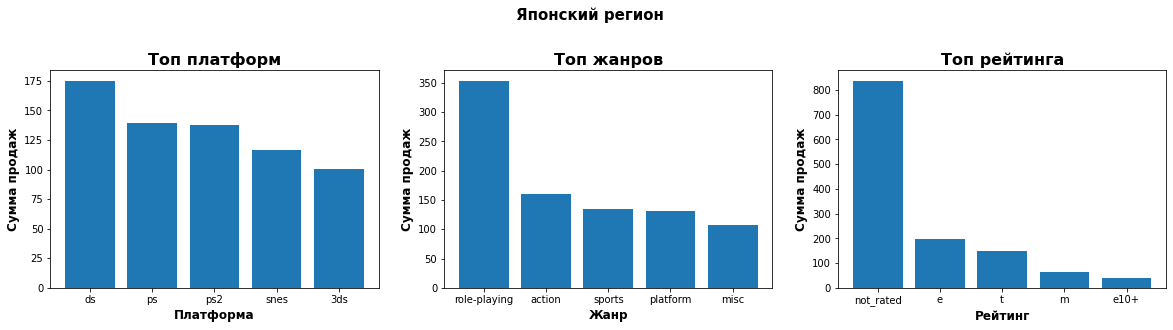

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.bar(top5_platforms_alltime_jp['platform'], top5_platforms_alltime_jp['jp_sales'])
ax1.set_title("Топ платформ", fontsize=16, fontweight="bold")
ax1.set_xlabel('Платформа', fontsize=12, fontweight="bold")
ax1.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

ax2.bar(top5_genre_alltime_jp['genre'], top5_genre_alltime_jp['jp_sales'])
ax2.set_title("Топ жанров", fontsize=16, fontweight="bold")
ax2.set_xlabel('Жанр', fontsize=12, fontweight="bold")
ax2.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")
    
ax3.bar(top5_rating_alltime_jp['rating'], top5_rating_alltime_jp['jp_sales'])
ax3.set_title("Топ рейтинга", fontsize=16, fontweight="bold")
ax3.set_xlabel('Рейтинг', fontsize=12, fontweight="bold")
ax3.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

fig.suptitle('Японский регион', fontsize=15, y=1.1, fontweight="bold")
plt.show()

* Самые популярные игровые платформы в Японском регионе за все время это: DS, PS, PS2, SNES, 3DS.
* Топ 5 жанров в Японии за все время: role-playing, action, sports, platform, misc.
* По рейтингам видно, что больше всего продаж за все время у игр без рейтинга, на втором месте игры с рейтингом "E" и на третьем месте игры с рейтингом "T".

In [102]:
def graph (df, region, name, axes):
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    sales.columns = ['sales']
    sales.plot(kind='pie', 
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'},
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')

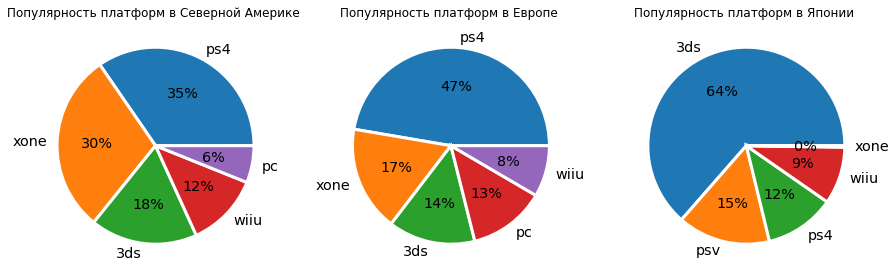

In [103]:
flg, axes = plt.subplots(1, 3, figsize = (15,8))
    
graph(top_platforms, 'na_sales', 'Северной Америке', axes[0])
graph(top_platforms, 'eu_sales', 'Европе', axes[1])
graph(top_platforms, 'jp_sales', 'Японии', axes[2])

### Портрет пользователя каждого региона за актуальный период

#### Портрет пользователя каждого региона за актуальный период для Американского региона

In [104]:
def pivot(region):
    for i in zip(list(['platform','genre','rating'])):
        pivvot = actual_data.pivot_table(index=i, values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head(5)
        display(pivvot)

In [105]:
top5_platforms_actual_na = actual_data.pivot_table(index='platform', values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)
top5_genre_actual_na = actual_data.pivot_table(index='genre', values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)
top5_rating_actual_na = actual_data.pivot_table(index='rating', values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index().head(5)

In [106]:
pivot('na_sales')

,platform,na_sales
0,x360,140.05
1,ps4,108.74
2,ps3,103.38
3,xone,93.12
4,3ds,55.31


,genre,na_sales
0,action,177.84
1,shooter,144.77
2,sports,81.53
3,role-playing,64.00
4,misc,38.19


,rating,na_sales
0,m,231.57
1,e,114.37
2,not_rated,103.31
3,e10+,75.70
4,t,66.02


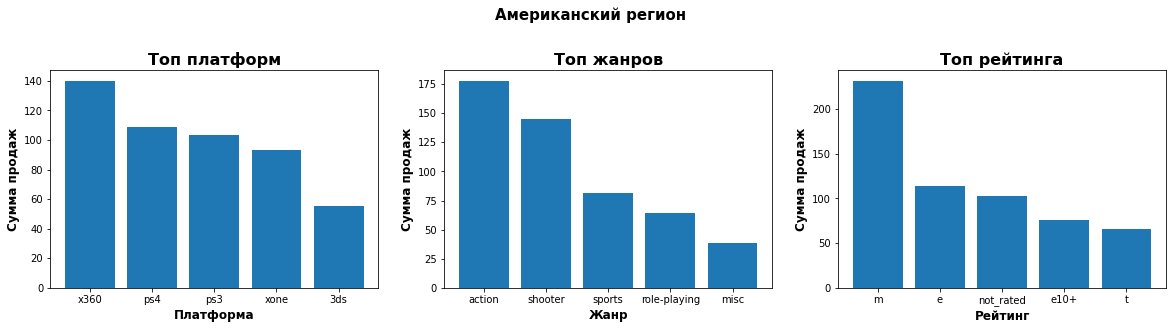

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.bar(top5_platforms_actual_na['platform'], top5_platforms_actual_na['na_sales'])
ax1.set_title("Топ платформ", fontsize=16, fontweight="bold")
ax1.set_xlabel('Платформа', fontsize=12, fontweight="bold")
ax1.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

ax2.bar(top5_genre_actual_na['genre'], top5_genre_actual_na['na_sales'])
ax2.set_title("Топ жанров", fontsize=16, fontweight="bold")
ax2.set_xlabel('Жанр', fontsize=12, fontweight="bold")
ax2.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")
    
ax3.bar(top5_rating_actual_na['rating'], top5_rating_actual_na['na_sales'])
ax3.set_title("Топ рейтинга", fontsize=16, fontweight="bold")
ax3.set_xlabel('Рейтинг', fontsize=12, fontweight="bold")
ax3.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

fig.suptitle('Американский регион', fontsize=15, y=1.1, fontweight="bold")
plt.show()

* Самые популярные игровые платформы в Американском регионе за актуальный период это: X360, PS4, PS3, XONE, 3DS.
* Топ 5 жанров в Европе за актуальный период: action, shooter, sports, role-playing, misc.
* По рейтингам видно, что больше всего продаж у игр с рейтингом "M", на втором месте игры с рейтингом "E" и на третьем месте игры без рейтинга

#### Портрет пользователя каждого региона за актуальный период для Европейского региона

In [108]:
top5_platforms_actual_eu = actual_data.pivot_table(index='platform', values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)
top5_genre_actual_eu = actual_data.pivot_table(index='genre', values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)
top5_rating_actual_eu = actual_data.pivot_table(index='rating', values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index().head(5)

In [109]:
pivot('eu_sales')

,platform,eu_sales
0,ps4,141.09
1,ps3,106.86
2,x360,74.52
3,xone,51.59
4,3ds,42.64


,genre,eu_sales
0,action,159.34
1,shooter,113.47
2,sports,69.09
3,role-playing,48.53
4,racing,27.29


,rating,eu_sales
0,m,193.96
1,e,113.03
2,not_rated,91.50
3,e10+,55.37
4,t,52.96


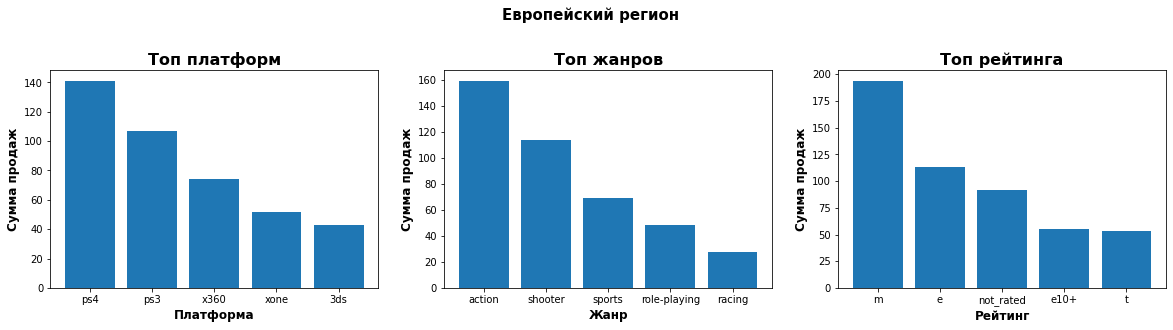

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.bar(top5_platforms_actual_eu['platform'], top5_platforms_actual_eu['eu_sales'])
ax1.set_title("Топ платформ", fontsize=16, fontweight="bold")
ax1.set_xlabel('Платформа', fontsize=12, fontweight="bold")
ax1.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

ax2.bar(top5_genre_actual_eu['genre'], top5_genre_actual_eu['eu_sales'])
ax2.set_title("Топ жанров", fontsize=16, fontweight="bold")
ax2.set_xlabel('Жанр', fontsize=12, fontweight="bold")
ax2.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")
    
ax3.bar(top5_rating_actual_eu['rating'], top5_rating_actual_eu['eu_sales'])
ax3.set_title("Топ рейтинга", fontsize=16, fontweight="bold")
ax3.set_xlabel('Рейтинг', fontsize=12, fontweight="bold")
ax3.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

fig.suptitle('Европейский регион', fontsize=15, y=1.1, fontweight="bold")
plt.show()

* Самые популярные игровые платформы в Европейском регионе за актуальный период это: PS4, PS3, X360, XONE, 3DS.
* Топ 5 жанров в Европе за актуальный период: action, shooter, sports, role-playing, racing.
* По рейтингам видно, что больше всего продаж у игр с рейтингом "M", на втором месте игры с рейтингом "E" и на третьем месте игры без рейтинга

#### Портрет пользователя каждого региона за актуальный период для Японии

In [111]:
top5_platforms_actual_jp = actual_data.pivot_table(index='platform', values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)
top5_genre_actual_jp = actual_data.pivot_table(index='genre', values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)
top5_rating_actual_jp = actual_data.pivot_table(index='rating', values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index().head(5)

In [112]:
pivot('jp_sales')

,platform,jp_sales
0,3ds,87.79
1,ps3,35.29
2,psv,21.04
3,ps4,15.96
4,wiiu,13.01


,genre,jp_sales
0,role-playing,65.44
1,action,52.80
2,misc,12.86
3,simulation,10.41
4,fighting,9.44


,rating,jp_sales
0,not_rated,108.84
1,e,28.33
2,t,26.02
3,m,21.20
4,e10+,8.19


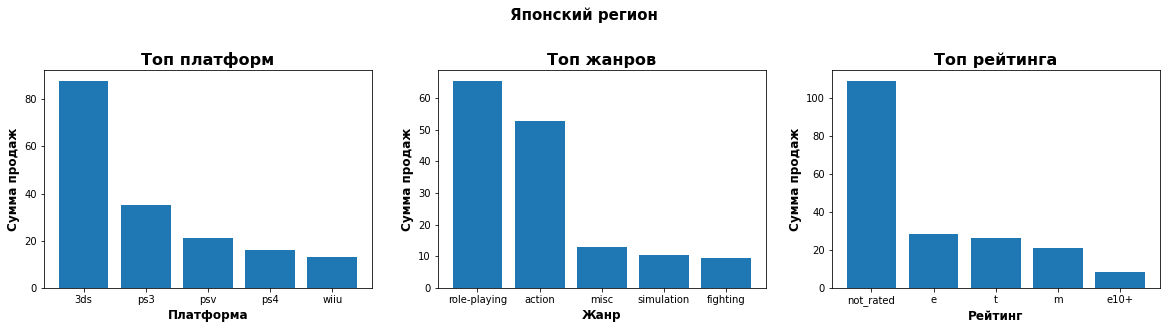

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.bar(top5_platforms_actual_jp['platform'], top5_platforms_actual_jp['jp_sales'])
ax1.set_title("Топ платформ", fontsize=16, fontweight="bold")
ax1.set_xlabel('Платформа', fontsize=12, fontweight="bold")
ax1.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

ax2.bar(top5_genre_actual_jp['genre'], top5_genre_actual_jp['jp_sales'])
ax2.set_title("Топ жанров", fontsize=16, fontweight="bold")
ax2.set_xlabel('Жанр', fontsize=12, fontweight="bold")
ax2.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")
    
ax3.bar(top5_rating_actual_jp['rating'], top5_rating_actual_jp['jp_sales'])
ax3.set_title("Топ рейтинга", fontsize=16, fontweight="bold")
ax3.set_xlabel('Рейтинг', fontsize=12, fontweight="bold")
ax3.set_ylabel('Сумма продаж', fontsize=12, fontweight="bold")

fig.suptitle('Японский регион', fontsize=15, y=1.1, fontweight="bold")
plt.show()

* Самые популярные игровые платформы в Японском регионе за актуальный период это: 3DS, PS3, PSV, PS4, WIIU
* Топ 5 жанров в Европе за актуальный период: role-playing, action, misc, simulation, fighting.
* По рейтингам видно, что больше всего продаж у игр без рейтинга, на втором месте игры с рейтингом "E" и на третьем месте игры с рейтингом "T"

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги платформ Xbox One и PC равны (в H0 всегда используется знак равенства);

H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC.

Альтернативная гипотеза у нас двусторонняя, т.к. средний рейтинг может отличаться от как в большую так и в меньшую сторону.

Выделим отдельно подходящие данные

In [114]:
xone = actual_data[(actual_data['platform']=='xone')]['user_score']
pc = actual_data[(actual_data['platform']=='pc')]['user_score']

In [115]:
print('Средний рейтинг пользователя для XOne платформ:', round(xone.mean(), 2))
print('Средний рейтинг пользователя для PC платформ:', round(pc.mean(),2))

Средний рейтинг пользователя для XOne платформ: 6.52
Средний рейтинг пользователя для PC платформ: 6.43


In [116]:
print('Дисперсия для XOne платформ:', round(np.var(xone),2))
print('Дисперсия для PC платформ:', round(np.var(pc), 2))

Дисперсия для XOne платформ: 1.9
Дисперсия для PC платформ: 2.76


In [117]:
alpha = 0.05

results = st.ttest_ind(xone, pc, nan_policy='omit', equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134987
Не получилось отвергнуть нулевую гипотезу


**Вывод** 

P-value - Это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна.

Полученное значение p-value говорит о том, что с вероятностью более 54.9% различие рейтингов двух платформ можно получить случайно. Вероятность нулевой гипотезы очень велика, поэтому мы не можем ее отбросить и сказать, что средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Вторая гипотеза для проверки звучит так - средние пользовательские рейтинги жанров Action и Sports разные.

H0 - средние пользовательские рейтинги жанров Action и Sports равны (в H0 всегда используется знак равенства);

H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

In [118]:
action = actual_data[(actual_data['genre']=='action')]['user_score']
sports = actual_data[(actual_data['genre']=='sports')]['user_score']

In [119]:
print('Средняя оценка для жанра "Action":', round(action.mean(), 2))
print('Средний оценка для жанра "Sports":', round(sports.mean(),2))

Средняя оценка для жанра "Action": 6.83
Средний оценка для жанра "Sports": 5.46


In [120]:
print('Дисперсия для жанра "Action":', round(np.var(action),2))
print('Дисперсия для жанра "Sports":', round(np.var(sports), 2))

Дисперсия для жанра "Action": 1.89
Дисперсия для жанра "Sports": 3.01


In [121]:
alpha = 0.05

results = st.ttest_ind(action, sports, nan_policy='omit', equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод** : Получив p-value, мы отвергли Нулевую гипотезу. Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится

## Вывод

Перед анализом данных мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы. Привели к правильным типам данных необходимые столбцы. Проведя анализ, мы выявили пять периодов игровой индустрии:

* 1980 - 1994г - так сказать рассвет, начало игровой индустрии;
* 1995 - 2001г - период, когда "игру" еще нельзя было назвать "игрой", но люди уже жаждали этого;
* 2002 - 2007г - появление мастадонтов игровой индрустрии, которые полностью завоевали рынок;
* 2008 - 2009г - пик игровой индустрии, самые большое количество выпущенных игр;
* 2010 - 2011г - начало спада количества игр, связанный с тем, что игры стали более комплексные
* 2012 - настоящее время - спад количества игр (скорее связанный не с потерей интереса к видеоиграм, а с вытеснением более мелких компаний, а так же более комплексных проектов)

За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WIII, DS, PS. Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 8-10 лет. 

Также мы выявили, что на продажи оценки критиков влияют в малой степени, в то время как оценка пользователей не влияет

После мы составили портреты пользователей каждого региона за все года.

Самые популярные игровые платформы в Северной Америке это: XBOX, PS2, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "E", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "T".

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "E", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "M".

Самые популярные игровые платформы в Японском регионе за все время это: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии за все время: role-playing, action, sports, platform, misc. По рейтингам видно, что больше всего продаж за все время у игр без рейтинга, на втором месте игры с рейтингом "E" и на третьем месте игры с рейтингом "T".


Если брать данные за актуальный период:

Самые популярные игровые платформы в Американском регионе за актуальный период это: X360, PS4, PS3, XONE, 3DS. Топ 5 жанров в Европе за актуальный период: action, shooter, sports, role-playing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "M", на втором месте игры с рейтингом "E" и на третьем месте игры без рейтинга

В Европейском Союзе:

Самые популярные игровые платформы в Европейском регионе за актуальный период это: PS4, PS3, X360, XONE, 3DS. Топ 5 жанров в Европе за актуальный период: action, shooter, sports, role-playing, racing. По рейтингам видно, что больше всего продаж у игр с рейтингом "M", на втором месте игры с рейтингом "E" и на третьем месте игры без рейтинга

В Японии:

Самые популярные игровые платформы в Японском регионе за актуальный период это: 3DS, PS3, PSV, PS4, WIIU Топ 5 жанров в Европе за актуальный период: role-playing, action, misc, simulation, fighting. По рейтингам видно, что больше всего продаж у игр без рейтинга, на втором месте игры с рейтингом "E" и на третьем месте игры с рейтингом "T"

Проведя исследовательский анализ данных о продажах видеоигр в мире можно сказать следующее:

В целом пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених и можно объеденить усилия и рекламный контент для этих направлений. Но необходимо более тщательно подготовить компанию в Японии.
Чтобы попасть на Японский рынок, нужно очень сильно понимать их культуру и традиции. Особенно вникнуть в атмосферу "Аниме", так как это самое основное направление не только в мультиках, но и в играх.

